# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()

import nltk
nltk.download('vader_lexicon')

from newsapi import NewsApiClient

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import pprint as pp

%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\15189\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [7]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.146037,0.054235,0.020490,0.925286
std,0.333504,0.060820,0.053286,0.079791
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.858500
50%,0.000000,0.050000,0.000000,0.948000
75%,0.416600,0.117000,0.000000,1.000000
max,0.811800,0.198000,0.363000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.223294,0.075629,0.021722,0.902660
std,0.360931,0.077265,0.045489,0.087585
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.849000
50%,0.214400,0.074000,0.000000,0.912000
75%,0.510600,0.132000,0.000000,1.000000
max,0.883400,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a higher mean positive score (.077948 vs .019776).

Q: Which coin had the highest compound score?

A: Ethereum had a higher mean compound score (.231637 vs 0.151863) and the highest compound score (.883400 vs .811800).

Q. Which coin had the highest positive score?

A: Ethereum had a highest positive score (.347000 vs .198000).

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [42]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
sw_addon = {'a', 'to', 'for','than','', 'char', 'chars','reuters'}

In [43]:
# Complete the tokenizer function
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    tokens=[]
    """Tokenizes text."""
    # Create a list of the words
    words_list = word_tokenize(text)

    # Convert the words to lowercase
    first_result = [word.lower() for word in words_list]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    re_clean = [regex.sub('',sentences) for sentences in first_result]
    
    # Remove the stop words
    words = [word for word in re_clean if word not in sw.union(sw_addon)]
    
    # Lemmatize Words into root words
    for word in words:
        tokens.append(lemmatizer.lemmatize(word))
    
    return tokens

In [44]:
# Create a new tokens column for bitcoin
for article in btc_df:
    btc_df['tokens'] = [tokenizer(text) for text in btc_df['text']]
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visa, partnered, cryptocurrency, startup, blo..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [45]:
# Create a new tokens column for ethereum
for article in eth_df:
    eth_df['tokens'] = [tokenizer(text) for text in eth_df['text']]
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, digital, currency, ethereum, xrp, soa..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, institutional, investor, pumped, m..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [46]:
from collections import Counter
from nltk import ngrams

In [47]:
# Generate the Bitcoin N-grams where N=2
big_string = ""
for tokens in btc_df['tokens']:
    for token in tokens:
        big_string = " ".join((big_string,token))

bigrams = ngrams((tokenizer(big_string)), n=2)
bigram_counts = dict(Counter(bigrams))
bigram_df = pd.DataFrame(list(bigram_counts.items()), columns=['bigram', 'count'])
bigram_df.head()

,bigram,count
0,"(former, microsoft)",2
1,"(microsoft, software)",2
2,"(software, engineer)",2
3,"(engineer, ukraine)",2
4,"(ukraine, sentenced)",2


In [48]:
# Generate the Ethereum N-grams where N=2
for tokens in eth_df['tokens']:
    for token in tokens:
        big_string = " ".join((big_string,token))

bigrams = ngrams((tokenizer(big_string)), n=2)
bigram_counts = dict(Counter(bigrams))
bigram_df = pd.DataFrame(list(bigram_counts.items()), columns=['bigram', 'count'])
bigram_df.head()

,bigram,count
0,"(former, microsoft)",2
1,"(microsoft, software)",2
2,"(software, engineer)",2
3,"(engineer, ukraine)",2
4,"(ukraine, sentenced)",2


In [49]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string = ""
    for token_list in tokens:
        for token in token_list:
            big_string = " ".join((big_string,token))
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [50]:
# Get the top 10 words for Bitcoin
token_count(btc_df.tokens, N=10)

,word,count
0,bitcoin,89
1,currency,39
2,photo,33
3,virtual,33
4,taken,31
5,file,29
6,illustration,27
7,reutersdado,27
8,representation,26
9,seen,26


In [51]:
# Get the top 10 words for Ethereum
token_count(eth_df.tokens, N=10)

,word,count
0,ethereum,56
1,bitcoin,46
2,cryptocurrency,19
3,blockchain,16
4,new,15
5,li,15
6,currency,13
7,week,13
8,asset,13
9,price,13


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

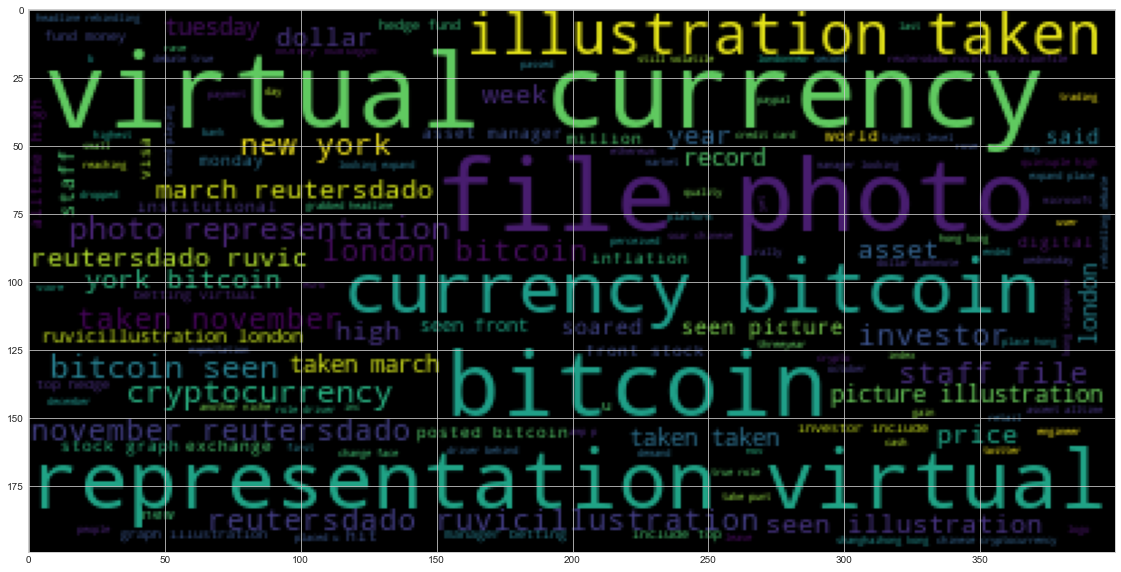

In [53]:
# Generate the Bitcoin word cloud
big_string = ""
for token_list in btc_df.tokens:
    for token in token_list:
        big_string = " ".join((big_string,token))

processed = tokenizer(big_string)

elements = [word.lower().replace(' ', '_') for word in processed]
wc = WordCloud().generate(' '.join(elements))
plt.imshow(wc)

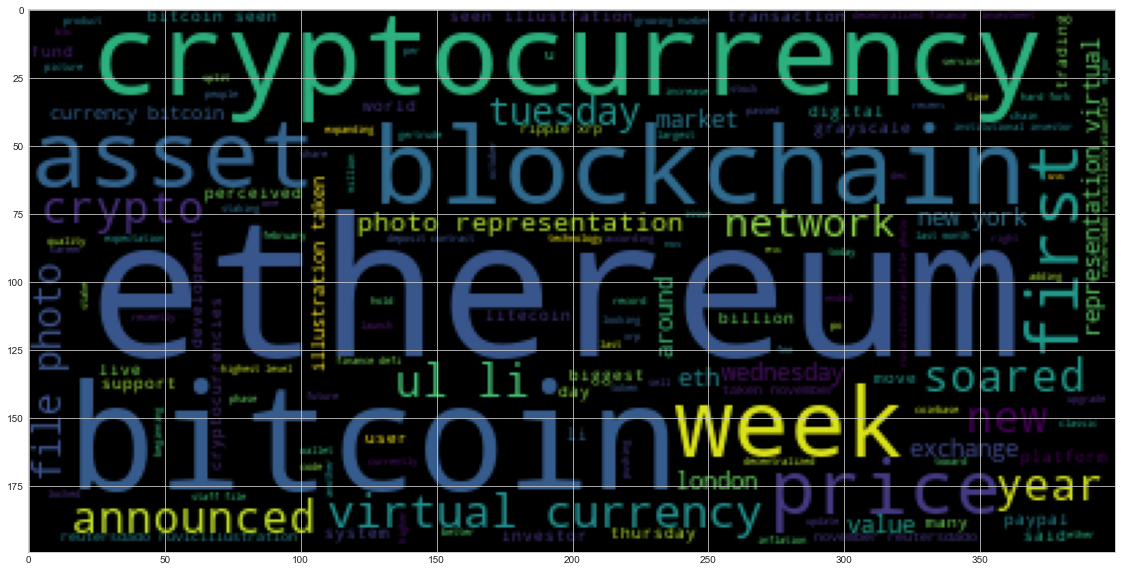

In [54]:
# Generate the Ethereum word cloud
big_string = ""
for token_list in eth_df.tokens:
    for token in token_list:
        big_string = " ".join((big_string,token))

processed = tokenizer(big_string)

elements = [word.lower().replace(' ', '_') for word in processed]
wc = WordCloud().generate(' '.join(elements))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [55]:
import spacy
from spacy import displacy

In [56]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [57]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [ ]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f